# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

* import bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

%matplotlib inline

* Carregamento e preparação do dataset

In [16]:
df = sns.load_dataset('tips')

# Porcentangem que a gorjeta representa do valor pago
df['tip_pct'] = df['tip'] / df['total_bill']

# Valor liquido pago sem a gorjeta
df['net_bill'] = df['total_bill'] - df['tip'] 

# Removo outliers
df = df[ df['tip_pct'] < 0.5 ]

df.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,17.51


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [32]:
reg = smf.ols(data = df,
              formula = 'tip_pct ~ np.log(net_bill)')

modelo = reg.fit()

print(f"R-SQUARED do modelo: {modelo.rsquared}")

R-SQUARED do modelo: 0.23853330794870498


* Gráfico exibindo a linha de previsão do algoritmo

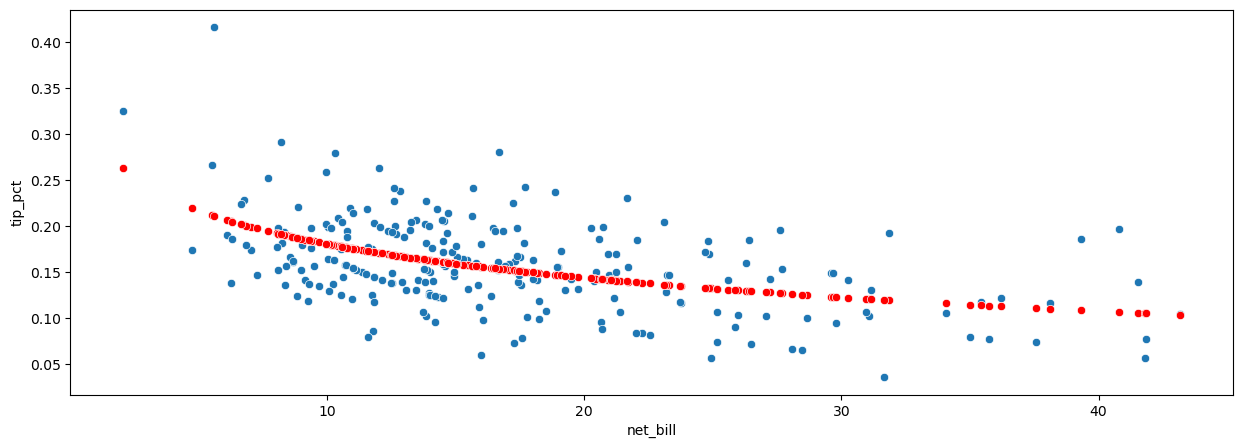

In [33]:
plt.figure(figsize=[15,5])

ax = sns.scatterplot(data = df, x = 'net_bill', y = 'tip_pct')

ax_prev = sns.scatterplot(data = df, x = 'net_bill', y = modelo.fittedvalues, color = 'red')

plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [34]:
reg = smf.ols(data = df,
              formula = 'tip_pct ~ np.power(net_bill, 2)')

modelo = reg.fit()

print(f"R-SQUARED do modelo: {modelo.rsquared}")

R-SQUARED do modelo: 0.16397580386197574


* Gráfico exibindo a linha de previsão do algoritmo

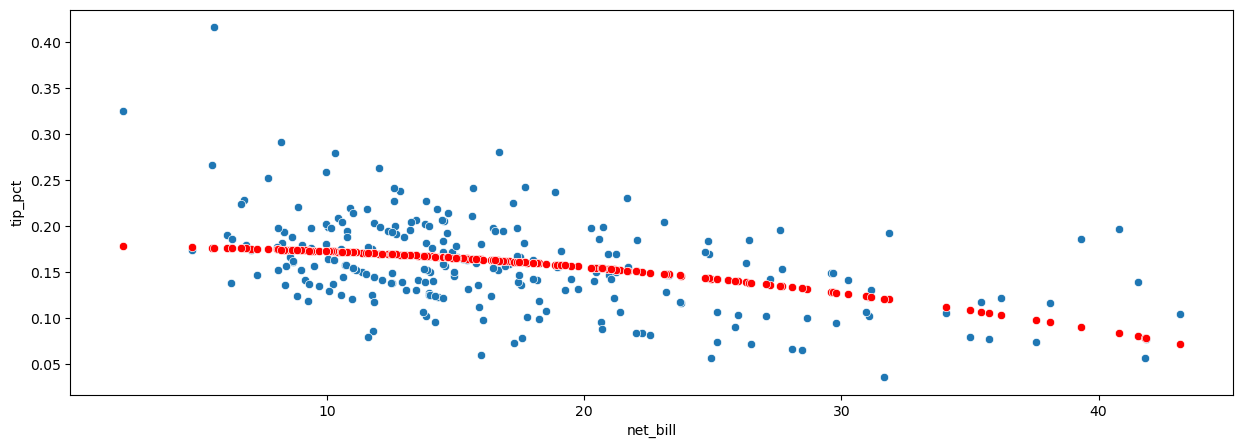

In [36]:
plt.figure(figsize=[15,5])

ax = sns.scatterplot(data = df, x = 'net_bill', y = 'tip_pct')

ax_prev = sns.scatterplot(data = df, x = 'net_bill', y = modelo.fittedvalues, color = 'red')

plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [51]:
reg = smf.ols(data = df,
              formula = 'np.log(tip_pct) ~ net_bill')

modelo = reg.fit()

df['previsao_y'] = np.exp(modelo.fittedvalues)

r_quadrado = df[ ['tip_pct', 'previsao_y'] ].corr().iloc[0,1] ** 2

print(f"R-SQUARED do modelo: {r_quadrado}")

R-SQUARED do modelo: 0.2162320285168598


* Gráfico exibindo a linha de previsão do algoritmo

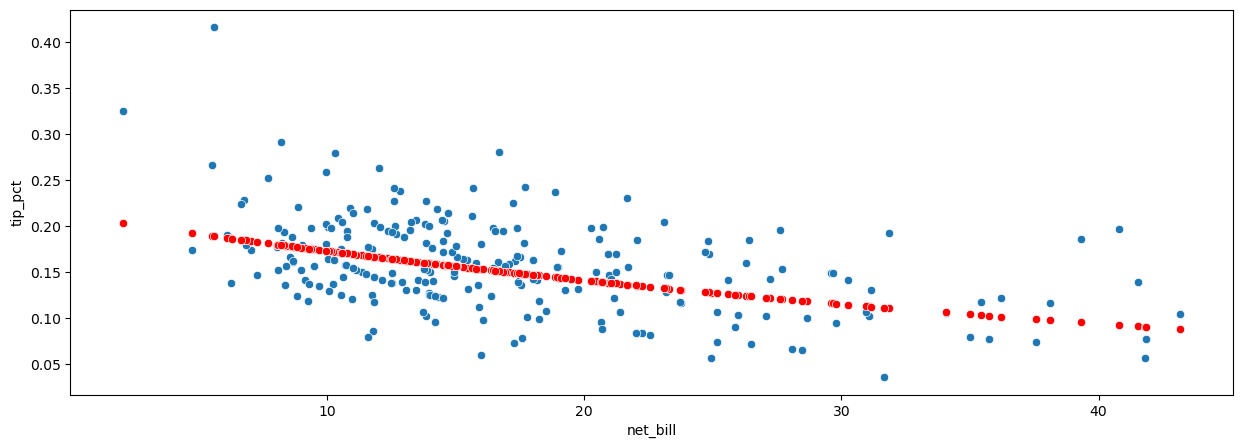

In [55]:
plt.figure(figsize=[15,5])

ax = sns.scatterplot(data = df, x = 'net_bill', y = 'tip_pct')

ax_prev = sns.scatterplot(data = df, x = 'net_bill', y = 'previsao_y', color = 'red')

plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [58]:
reg = smf.ols(data = df,
              formula = 'np.log(tip_pct) ~ np.log(net_bill)')

modelo = reg.fit()

df['previsao_y'] = np.exp(modelo.fittedvalues)

r_quadrado = df[ ['tip_pct', 'previsao_y'] ].corr().iloc[0,1] ** 2

print(f"R-SQUARED do modelo: {r_quadrado}")

R-SQUARED do modelo: 0.24369128199339055


* Gráfico exibindo a linha de previsão do algoritmo

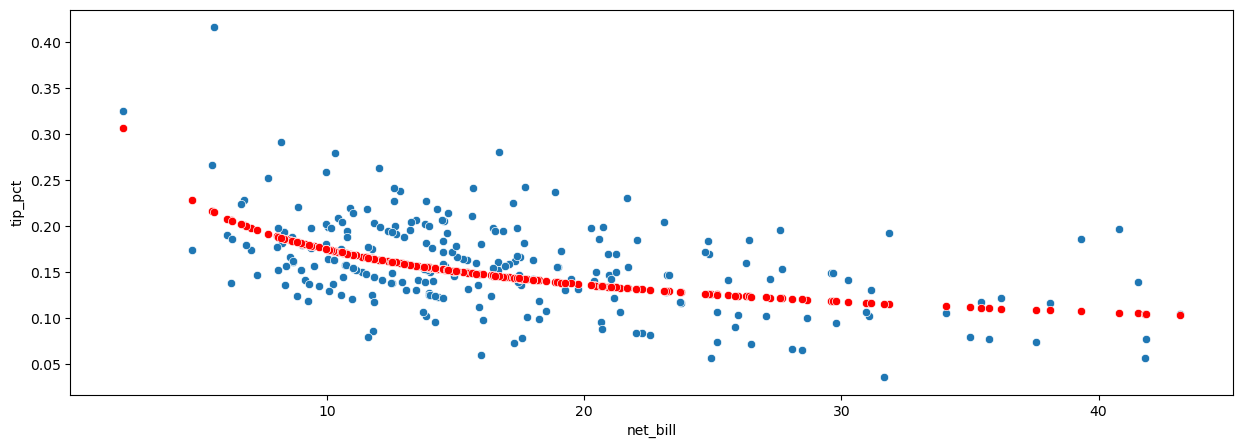

In [59]:
plt.figure(figsize=[15,5])

ax = sns.scatterplot(data = df, x = 'net_bill', y = 'tip_pct')

ax_prev = sns.scatterplot(data = df, x = 'net_bill', y = 'previsao_y', color = 'red')

plt.show()

###  6. qual modelo resultou no melhor ajuste?

##### 


1) log(tip_pct) ~ log(net_bill): $R^2$ = 24,36%

2) tip_pct ~ log(net_bill)     : $R^2$ = 23,85%

3) log(tip_pct) ~ net_bill     : $R^2$ = 21,62%

4) tip_pct ~ power(net_bill, 2): $R^2$ = 16,39%

